<a href="https://colab.research.google.com/github/EYOSIYAS7/Machine_Learning_Projects/blob/main/image_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow opencv-python matplotlip

In [ ]:
import tensorflow as tf
import os

In [ ]:
gpus = tf.config.experimental.list_physical_devices("GPU")

In [ ]:
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
import imghdr
import cv2
from matplotlib import pyplot as plt

In [ ]:
data_dir = '/content/data2'
img_exit = ['jpg','png', 'jpeg', 'bmp ']

In [ ]:
!pip install patool

In [ ]:
import patoolib

In [ ]:
patoolib.extract_archive("/content/data/s (2).zip")

In [ ]:
newData = os.listdir('/content/data2')

In [ ]:
print(os.listdir(data_dir))

In [ ]:
for img_class in  os.listdir(data_dir):
  for img in os.listdir(os.path.join(data_dir,img_class)):
    img_path = os.path.join(data_dir, img_class,img)

    try:
      image = cv2.imread(img_path)
      tip = imghdr.what(img_path)

      if tip not in img_exit:
        print("undesired extention {}".format(img_path))
        os.remove(img_path)
    except Exception  as e:
       print("issue with the img {}".format(img_path))
       os.remove(img_path)

In [ ]:
image = cv2.imread(os.path.join(data_dir,"h","images94.jpg"))
print(image.shape)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [ ]:
import numpy as np

In [ ]:
tf.keras.utils.image_dataset_from_directory

<function keras.utils.image_dataset.image_dataset_from_directory(directory, labels='inferred', label_mode='int', class_names=None, color_mode='rgb', batch_size=32, image_size=(256, 256), shuffle=True, seed=None, validation_split=None, subset=None, interpolation='bilinear', follow_links=False, crop_to_aspect_ratio=False, **kwargs)>

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 133 files belonging to 2 classes.


In [ ]:
scaled_data = data.map( lambda x,y: (x/255 , y))

In [ ]:
scaled_itrator = scaled_data.as_numpy_iterator()

In [ ]:
scaled_batch = scaled_itrator.next()

In [ ]:
scaled_batch[0].shape

(32, 256, 256, 3)

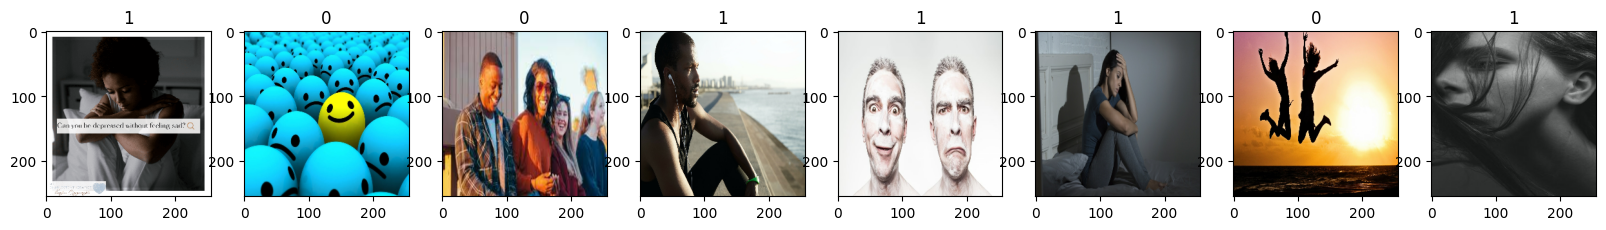

In [ ]:
fig , ax = plt.subplots(ncols=8, figsize=(20,20))
for idx ,img in enumerate(scaled_batch[0][0:8]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(scaled_batch[1][idx])

In [ ]:
len(data)

5

In [ ]:
train_size = int((len(data)*.6))
val_size = int((len(data)*.2))
test_size = int((len(data)*.2))

In [ ]:
train_data = data.take(train_size)
val_data = data.skip(train_size).take(val_size)
test_data = data.skip(train_size+val_size).take(test_size)

In [ ]:
scaled_batch[0].shape

(32, 256, 256, 3)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D ,MaxPooling2D, Dense, Flatten

# Creating Sequential Model

In [ ]:
model = Sequential()
model

In [ ]:
model.add(Conv2D(16,(3,3), 1, activation='relu', input_shape=(256, 256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32 ,(3,3), 1 , activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32 ,(3,3), 1 , activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics= ['accuracy'])

In [ ]:
log_dir = 'log'

In [ ]:
tensorboard_callback =tf.keras.callbacks.TensorBoard(log_dir=log_dir)

In [ ]:
hist = model.fit(train_data, epochs=50, validation_data=val_data, callbacks=[tensorboard_callback])

Model Evaluation

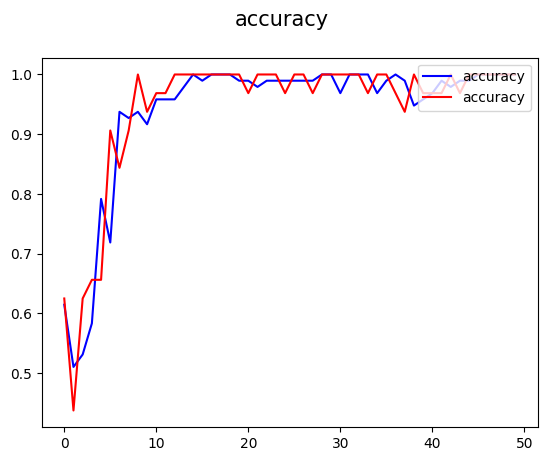

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color= 'blue', label= "accuracy")
plt.plot(hist.history['val_accuracy'], color= 'red', label= "accuracy")
fig.suptitle("accuracy", fontsize=15)
plt.legend(loc="upper right")
plt.show()

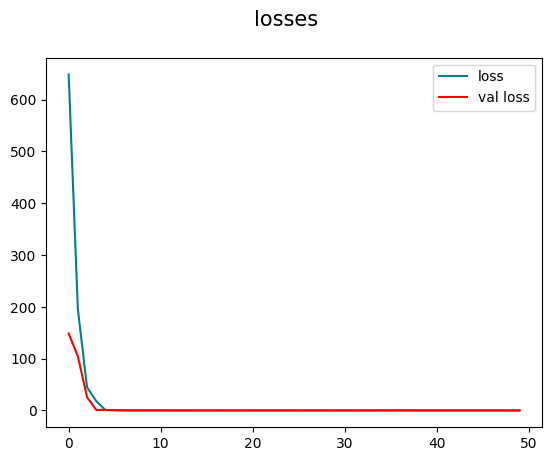

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color= 'teal', label= "loss")
plt.plot(hist.history['val_loss'], color= 'red', label= "val loss")
fig.suptitle("losses", fontsize=15)
plt.legend(loc="upper right")
plt.show()

In [ ]:
from tensorflow.keras.models import load_model

# Saving the model

In [ ]:
model.save(os.path.join('models', 'sentimentImagemodel.h5'))

# Inference

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
img = cv2.imread('/content/s2test.jfif')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt(show)

In [ ]:
resize = tf.image.resize(img, (256,256))

In [ ]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [ ]:
modelPrediction = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 29ms/step


In [ ]:
modelPrediction

array([[0.49637544]], dtype=float32)